<a href="https://colab.research.google.com/github/Fatai-soliu/python/blob/main/MLDM_Week5_Clasification_(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification problem is common in Marketing

One of the main applications of classification is marketing. Sometimes the product a
company is advertising is not suitable for all people. For example, a person between the
ages of 20 and 25 may like to spend more on smartphone covers than a person between the
ages of 40 and 45. Likewise, a high-income person can afford to spend more on luxury
goods than a low-income person. A business that wants to advertise a product likes to know
which user will buy the product. This could be really helpful for the company selling their
products. Predicting if a user is a potential customer or not is a classification problem.
Therefore, in this workshop we will apply classification algorithms to predict if a user can
be a potential customer (will buy the advertised product) based on his/her attributes such
as age, gender, etc.

In [ ]:
#Import neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

In [8]:
#Import dataset

data = pd.read_csv('/content/drive/MyDrive/Datasets/Social_Network_Ads.csv')

In [55]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [13]:
data.shape

(400, 5)

In [14]:
data.describe(include='all')

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400,400.000000,400.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,204,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.655000,69742.500000,0.357500
std,7.165832e+04,NaN,10.482877,34096.960282,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,29.750000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,88000.000000,1.000000


What kind of information do you get?

There are 400 records in the dataset

No missing values present

All the individual in the dataset are above 18

The oldest person in the dataset is 60

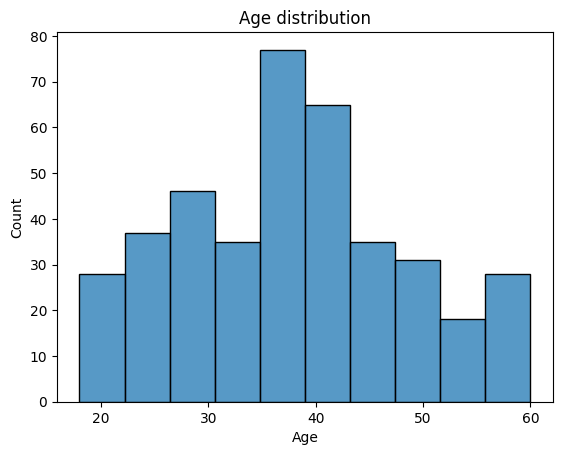

In [15]:
#Using seasborn to display Age distribution

sns.histplot(data.Age)
plt.title('Age distribution')
plt.show()

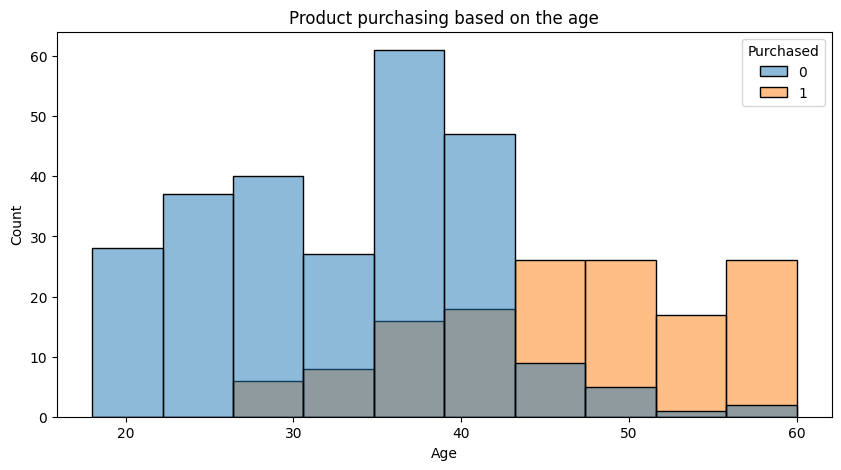

In [16]:
#We can explore the age distribution of those that have bought vs those that haven't

plt.figure(figsize=(10, 5))
plt.title("Product purchasing based on the age")
sns.histplot(x = "Age", hue='Purchased', data=data)
plt.show()

The visuals shows that people who age are above 40 are more interested in purchasing this product

In [17]:
##Since Gender is a categorical nominal variable, we need to convert it to a numerical variable using replace

data['Gender'] = data['Gender'].replace(['Male', 'Female'],[0, 1])
data.head()

<ipython-input-17-0fce52fb76d0>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace(['Male', 'Female'],[0, 1])


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


## Part 2: Applying Classification Algorithm - KNN

1. Determine the class label (dependent variable), and - Purchased Column - Y
2. Determine the input features (indepenedent variable) - Gender, Age, EstimatedSalary - X

In [23]:
X = data.iloc[:, [1,2,3]].values
y = data.iloc[:, [4]].values

#.values convert it into an array

In [25]:
#Splitting the dataset into training and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 0)

Scaling features

Why scaling features? or Standardization

Different features has different dimensions and scales and it can affect the modelling of the data.

Standardization involves performing numerical computation on the input variables by subracting the mean and dividing by the standard deviation to shift the distribution to have a mean of zero and a std of one.

When performing standardization, you should perform this operation on both the train and test data by using the same mean and variance.

Use fit_tranform() on the training data
Use transform() on the test data

In [26]:
#When performing standardization, you should perform this operation on both the train and test data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

In [37]:
X_train_s[1:5]

#When viewing a part of an array, just call the value with the subset you need, no need for loc or iloc

array([[-0.99288247,  2.17018137,  0.93098672],
       [ 1.00716855,  0.0133054 ,  1.22017719],
       [-0.99288247,  0.20938504,  1.07558195],
       [ 1.00716855,  0.40546467, -0.48604654]])

#Training the model

You can use KneighborsClassifier from scikit learn library to implement KNN model

In [41]:
##Fitting KNN to the Training set

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train_s, y_train)

##p rep power parameter for minkowski metric and it is equivalent to euclidean_distance

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [42]:
from sklearn.neighbors import KNeighborsClassifier

classifier2 = KNeighborsClassifier(n_neighbors= 3, metric='minkowski', p=2)
classifier2.fit(X_train_s, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

## Evaluating the Model

In [49]:
# Prediciting the test_set results so that we can compare it with the actual y_actual (y_test)

y_pred = classifier.predict(X_test_s)
y_pred[1:10]
#0 meaning Not purchased
#1 meaning purchased

array([0, 0, 0, 0, 0, 0, 1, 0, 1])

In [50]:
print(y_test[1:10])

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]


In [53]:
#To evaluate the accuracy and performance of the model

from sklearn import metrics
acc = metrics.accuracy_score(y_test, y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:" )
print(cm, '\n\n')
print('----------------------------------------')
results= metrics.classification_report(y_test, y_pred)
print('Classification Report:\n')
print(results)

accuracy:0.92


Confusion Matrix:
[[73  6]
 [ 4 37]] 


----------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.92      0.94        79
           1       0.86      0.90      0.88        41

    accuracy                           0.92       120
   macro avg       0.90      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120



Interpretation

True Positive: 37
False Positive: 6
True Negative: 73
False Negative: 4

Accuracy is 92% which indicate a high accuracy. The confusion matrix results above indicated that

FN=4, Customers are going to buy but the model predicts that they are NOT going to buy

FP = 6, Customers are NOT going to buy but the model predicts them that they are going to buy

We want the FN to be as low as possible, so that we do not exempt customers that are going to buy from our campaign and also reduce the number of FP so that we don't incur extra cost on acquiring customers who are not going to buy.

The model performs well because FN is lower than FP

What does the precision, recall and f1-score says about the model?

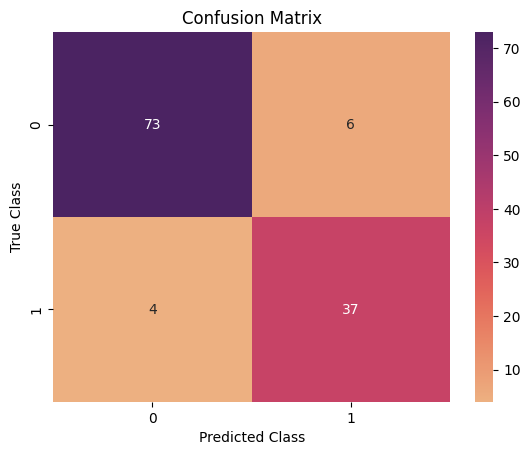

In [54]:
## Now, plot the confusion matrix using seaborn heatmap

ax = sns.heatmap(cm, cmap = 'flare', annot=True, fmt='d')

plt.xlabel("Predicted Class", fontsize=10)
plt.ylabel("True Class", fontsize=10)
plt.title("Confusion Matrix", fontsize=12)

plt.show()

In [56]:
## Recreate for Decision Tree